In [1]:
import pandas as pd 
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Pregnancies'] = scaler.fit_transform(df[['Pregnancies']])
df['Glucose'] = scaler.fit_transform(df[['Glucose']])
df['BloodPressure'] = scaler.fit_transform(df[['BloodPressure']])
df['SkinThickness'] = scaler.fit_transform(df[['SkinThickness']])
df['Insulin'] = scaler.fit_transform(df[['Insulin']])
df['BMI'] = scaler.fit_transform(df[['BMI']])
df['DiabetesPedigreeFunction'] = scaler.fit_transform(df[['DiabetesPedigreeFunction']])
df['Age'] = scaler.fit_transform(df[['Age']])

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [11]:
from sklearn.model_selection import train_test_split 
X = df.iloc[:,:-1]
y = df.iloc[: , -1]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model  import LogisticRegression 
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score , classification_report 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassificationReport:\n", classification_report(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Accuracy: 0.7662337662337663

ClassificationReport:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

Intercept: [-5.46290525]
Coefficients: [[ 0.96417854  4.38982132 -0.56320185  0.27982869 -0.28462151  3.31221645
   1.13130055  1.71573515]]


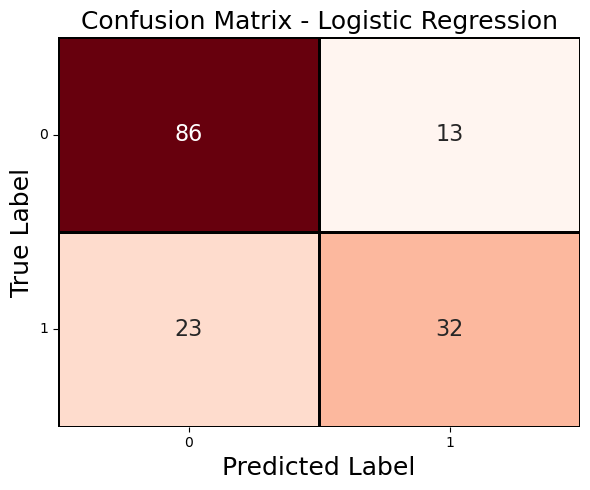

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
cbar=False, linewidths=1, linecolor='black', annot_kws={"size": 16})
plt.title('Confusion Matrix - Logistic Regression', fontsize=18)
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
# SGDClassifier 
from sklearn.linear_model import SGDClassifier 
model1 = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='optimal')
model1.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

In [22]:
y_pred1 = model1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("\nClassificationReport:\n", classification_report(y_test, y_pred1))
print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)

Accuracy: 0.6818181818181818

ClassificationReport:
               precision    recall  f1-score   support

           0       0.86      0.61      0.71        99
           1       0.54      0.82      0.65        55

    accuracy                           0.68       154
   macro avg       0.70      0.71      0.68       154
weighted avg       0.74      0.68      0.69       154

Intercept: [-8.10280803]
Coefficients: [[ 1.58542909  7.31803125 -1.38380815  0.66121211 -1.69168378  7.22560317
   2.14110621  2.60693427]]


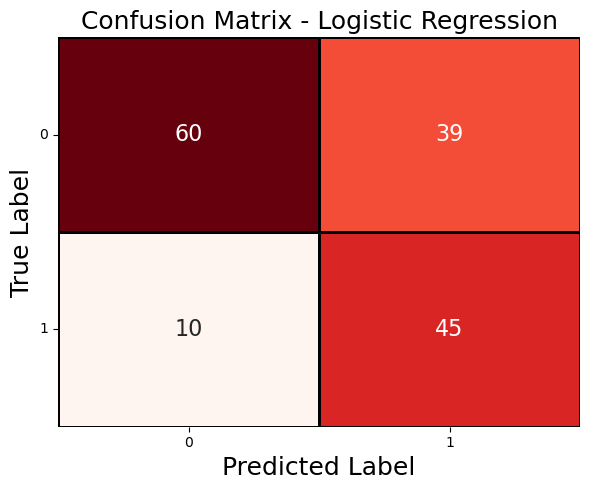

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
cbar=False, linewidths=1, linecolor='black', annot_kws={"size": 16})
plt.title('Confusion Matrix - Logistic Regression', fontsize=18)
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()